# Welcome to Covid19 Data Analysis Notebook Part 1
------------------------------------------

### This analysis studies the relationship between a given country's COVID-19 cases and the country's state of development, assesed by their GDP per capita, healthy life expectancy, social support, and their freedom to make life choices. 

### Task 1: Let's Import the modules 

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from IPython.display import Image, display
print('Modules are imported.')

Modules are imported.


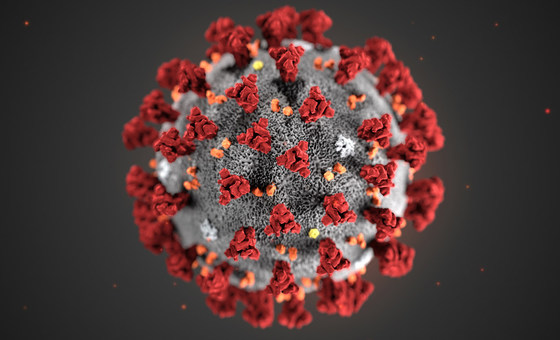

## Task 2 

### Task 2.1: Let's Import the COVID-19 dataset
Importing "Covid19_Confirmed_dataset.csv" from "./Dataset" folder. 


In [17]:
#Read the data and store it into an object. The path to the correct csv file is the argument for the .read_csv method
corona_dataset_csv = pd.read_csv("Datasets/covid19_Confirmed_dataset.csv")

#Print out the first 5 entries in the data set
corona_dataset_csv.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


#### Let's check the shape of the dataframe

In [18]:
corona_dataset_csv.shape

(266, 104)

### Task 2.2: Delete the useless columns

In [19]:
corona_dataset_csv.drop(["Lat", "Long"], axis=1, inplace=True)

In [20]:
corona_dataset_csv.head(10)

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27
5,NaN,Antigua and Barbuda,0,0,0,0,0,0,0,0,...,23,24,24,24,24,24,24,24,24,24
6,NaN,Argentina,0,0,0,0,0,0,0,0,...,3031,3144,3435,3607,3780,3892,4003,4127,4285,4428
7,NaN,Armenia,0,0,0,0,0,0,0,0,...,1401,1473,1523,1596,1677,1746,1808,1867,1932,2066
8,Australian Capital Territory,Australia,0,0,0,0,0,0,0,0,...,104,104,104,105,106,106,106,106,106,106
9,New South Wales,Australia,0,0,0,0,3,4,4,4,...,2969,2971,2976,2982,2994,3002,3004,3016,3016,3025


### Task 2.3: Aggregating the rows by the country

In [22]:
corona_dataset_aggregated = corona_dataset_csv.groupby("Country/Region").sum()

In [23]:
corona_dataset_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [24]:
corona_dataset_aggregated.shape

(187, 100)

### Task 2.4: Visualizing data related to a country for example China


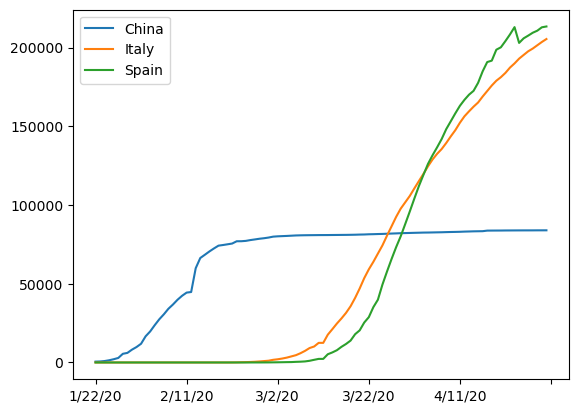

In [25]:
corona_dataset_aggregated.loc["China"].plot()
corona_dataset_aggregated.loc["Italy"].plot()
corona_dataset_aggregated.loc["Spain"].plot()
plt.legend()

### Task3: Calculating a good measure 
We need to find a good measure reperestend as a number, describing the spread of the virus in a country. 

<AxesSubplot: >

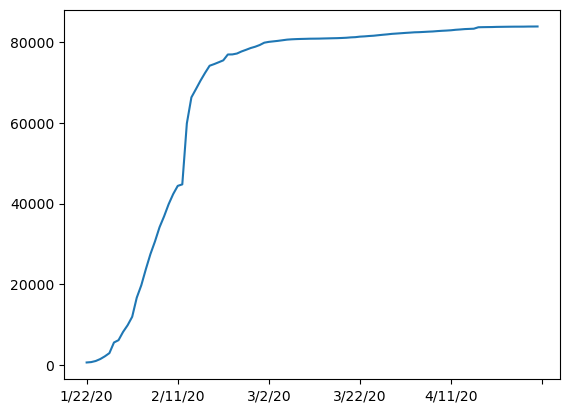

In [26]:
corona_dataset_aggregated.loc['China'].plot()

<AxesSubplot: >

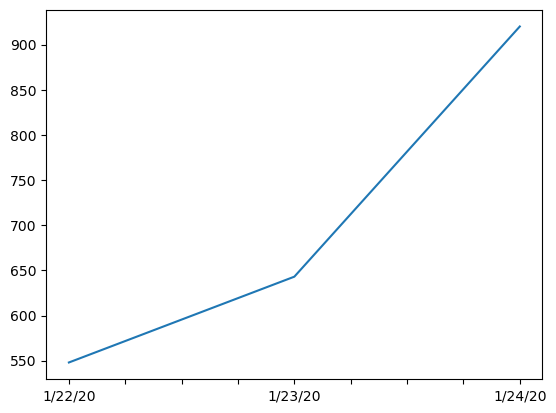

In [27]:
corona_dataset_aggregated.loc['China'][:3].plot()

### Task 3.1: Calculating the first derivative of the curve
The first derivative in this case is the infection rate.

<AxesSubplot: >

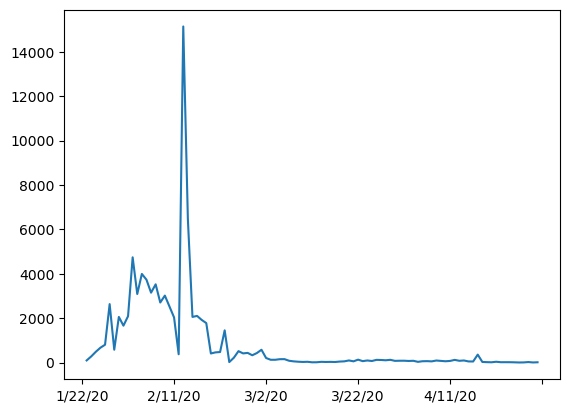

In [28]:
corona_dataset_aggregated.loc["China"].diff().plot()

### Task 3.2: Find the maxmimum infection rate for China, Italy and Spain

In [29]:
corona_dataset_aggregated.loc["China"].diff().max()

15136.0

In [30]:
corona_dataset_aggregated.loc["Italy"].diff().max()

6557.0

In [31]:
corona_dataset_aggregated.loc["Spain"].diff().max()

9630.0

### Task 3.3: Find maximum infection rate for all of the countries

In [32]:
#Take the maximum infection rate of each country and store them into a list.
countries = list(corona_dataset_aggregated.index)
max_infection_rates = []
for c in countries:
    max_infection_rates.append(corona_dataset_aggregated.loc[c].diff().max())
#Create a column in the data frame that stores each of the max infection rates.
corona_dataset_aggregated["max_infection_rate"] = max_infection_rates

In [33]:
corona_dataset_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_infection_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0


### Task 3.4: Create a new dataframe with only needed column 

In [34]:
corona_data = pd.DataFrame(corona_dataset_aggregated["max_infection_rate"])

In [35]:
corona_data.head()

,max_infection_rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


### Task4: 
- Importing the WorldHappinessReport.csv dataset
- selecting needed columns for our analysis 
- join the datasets 
- calculate the correlations as the result of our analysis

### Task 4.1 : Importing the dataset

In [36]:
happiness_report_csv = pd.read_csv("Datasets/worldwide_happiness_report.csv")

In [37]:
happiness_report_csv.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


### Task 4.2: Let's drop the useless columns 

In [38]:
useless_cols = ["Overall rank", "Score", "Generosity", "Perceptions of corruption"]

In [39]:
happiness_report_csv.drop(useless_cols, axis=1, inplace=True)
happiness_report_csv.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


### Task 4.3: Changing the indices of the dataframe

In [40]:
happiness_report_csv.set_index("Country or region",inplace=True) #set the indices of the data frame to be the countries.
happiness_report_csv.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


### Task4.4: Now let's join the two datasets we have prepared  

#### Corona Dataset :

In [41]:
corona_data.head()

,max_infection_rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


In [42]:
corona_data.shape

(187, 1)

#### World happiness report Dataset :

In [43]:
happiness_report_csv.shape

(156, 4)

In [44]:
data = corona_data.join(happiness_report_csv, how="inner")
data.head()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283


### Task 4.5: Correlation matrix 

In [45]:
data.corr()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infection_rate,1.000000,0.250118,0.191958,0.289263,0.078196
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000


### Task 5: Visualization of the results
Our analysis is not finished unless we visualize the results in terms figures and graphs so that everyone can understand what you get out of our analysis.

In [46]:
data.head()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283


### Task 5.1: Plotting GDP vs maximum Infection rate

<AxesSubplot: xlabel='GDP per capita', ylabel='max_infection_rate'>

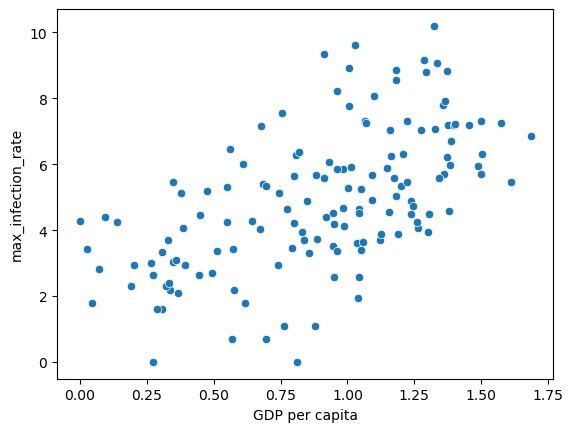

In [47]:
x = data["GDP per capita"]
y = data["max_infection_rate"]
sns.scatterplot(x=x,y=np.log(y))

<AxesSubplot: xlabel='GDP per capita', ylabel='max_infection_rate'>

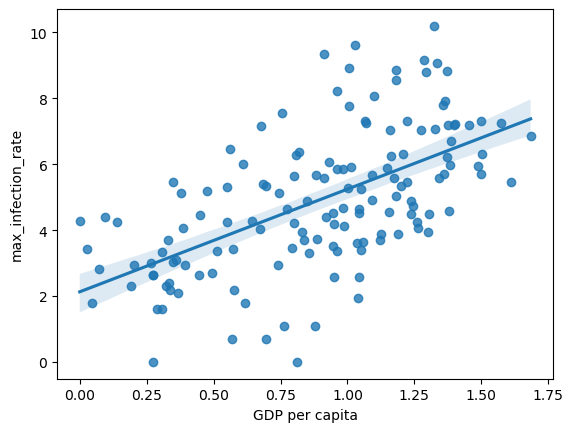

In [48]:
sns.regplot(x=x,y=np.log(y))

### Task 5.2: Plotting Social support vs maximum Infection rate

<AxesSubplot: xlabel='Social support', ylabel='max_infection_rate'>

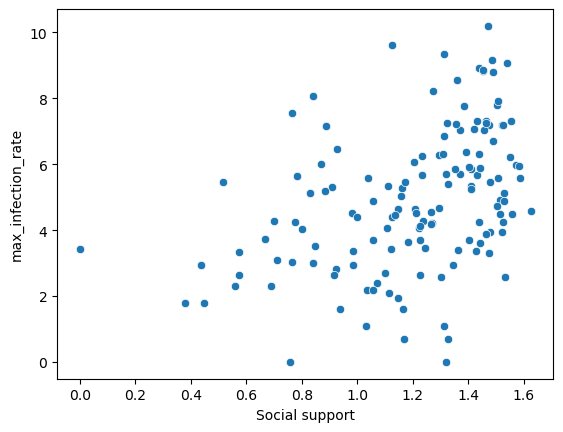

In [49]:
x = data["Social support"]
y = data["max_infection_rate"]
sns.scatterplot(x=x,y=np.log(y))

<AxesSubplot: xlabel='Social support', ylabel='max_infection_rate'>

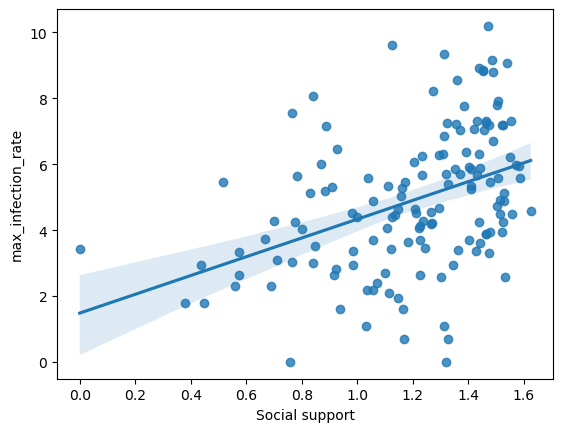

In [50]:
sns.regplot(x=x,y=np.log(y))

### Task 5.3: Plotting Healthy life expectancy vs maximum Infection rate

<AxesSubplot: xlabel='Healthy life expectancy', ylabel='max_infection_rate'>

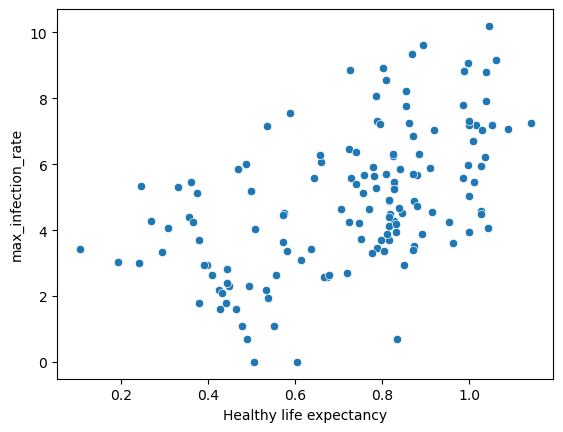

In [51]:
x = data["Healthy life expectancy"]
y = data["max_infection_rate"]
sns.scatterplot(x=x,y=np.log(y))

<AxesSubplot: xlabel='Healthy life expectancy', ylabel='max_infection_rate'>

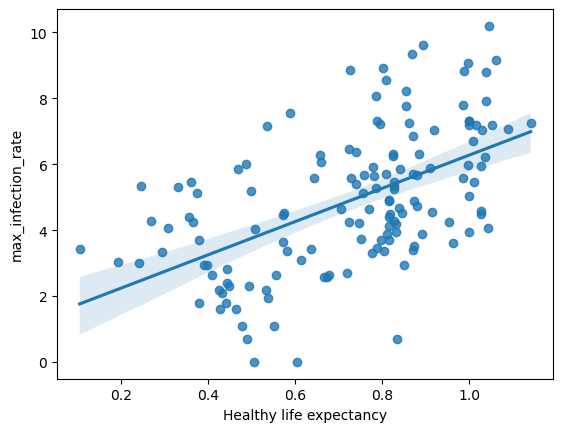

In [52]:
sns.regplot(x=x,y=np.log(y))

### Task 5.4: Plotting Freedom to make life choices vs maximum Infection rate

<AxesSubplot: xlabel='Freedom to make life choices', ylabel='max_infection_rate'>

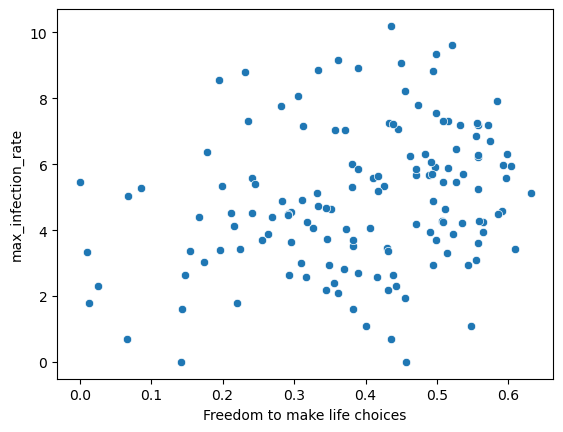

In [53]:
x = data["Freedom to make life choices"]
y = data["max_infection_rate"]
sns.scatterplot(x=x,y=np.log(y))

<AxesSubplot: xlabel='Freedom to make life choices', ylabel='max_infection_rate'>

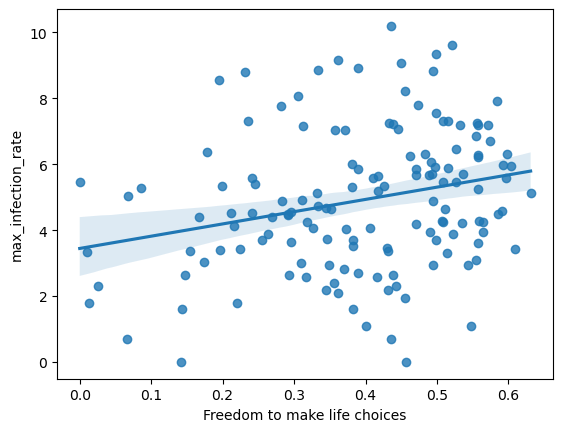

In [54]:
sns.regplot(x=x,y=np.log(y))

### Given our metrics of a country's state of development, people that live in more developed countries are more prone to getting the disease than those that live in less developed countries.